In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Load

In [2]:
# Loading the dataset
diabetes_df = pd.read_csv('dataset\diabetes.csv');

# Explorative Data Analysis

In [3]:
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes_df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Find number of rows and columns of the dataset
diabetes_df.shape

(768, 9)

In [6]:
# Find datatype for each columns
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# Check for missing values in dataset
diabetes_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
# Basic statistics before cleaning
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Data Pre-processing

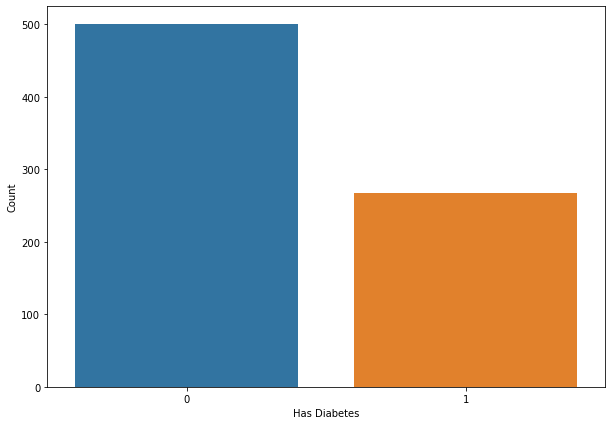

In [9]:
# Printing outcome of Diabetes dataset
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=diabetes_df)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

In [10]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN

diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

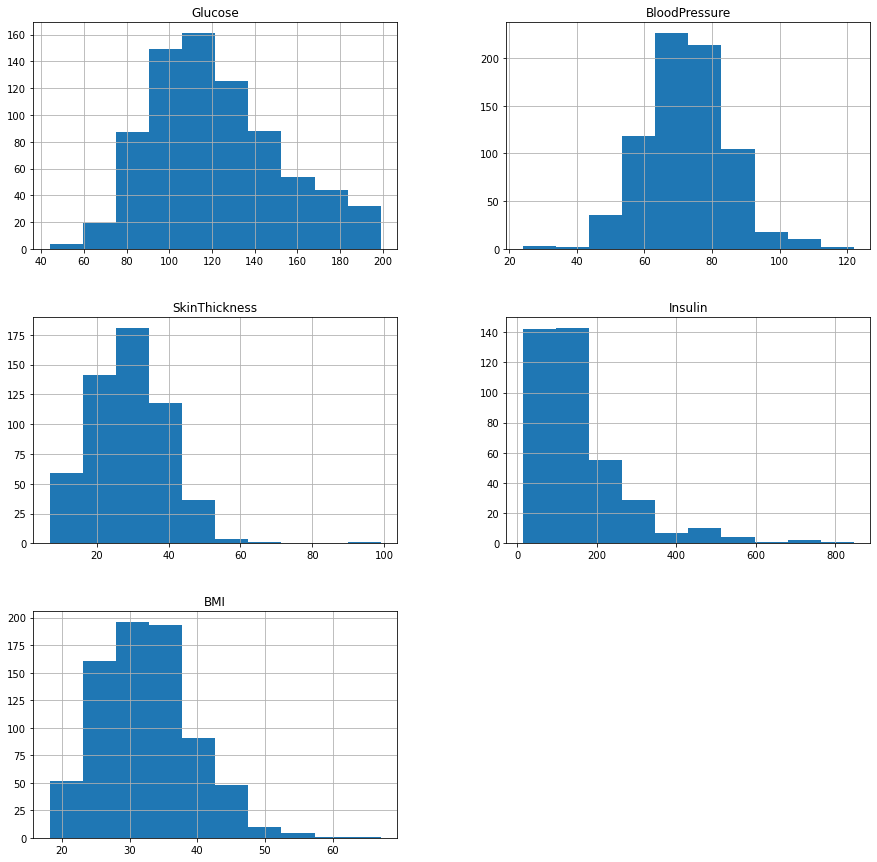

In [12]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = diabetes_df.hist(column=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] , figsize = (15,15))

# # Data imputation 
Reference : https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=You%20can%20use%20central%20tendency%20measures%20such%20as,using%20median%20or%20mode%20with%20skewed%20data%20distribution.

In [13]:
# Replacing NaN value by mean, median depending upon distribution
diabetes_df['Glucose'].fillna(int(diabetes_df['Glucose'].mean()), inplace=True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace=True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median(), inplace=True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median(), inplace=True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].median(), inplace=True)

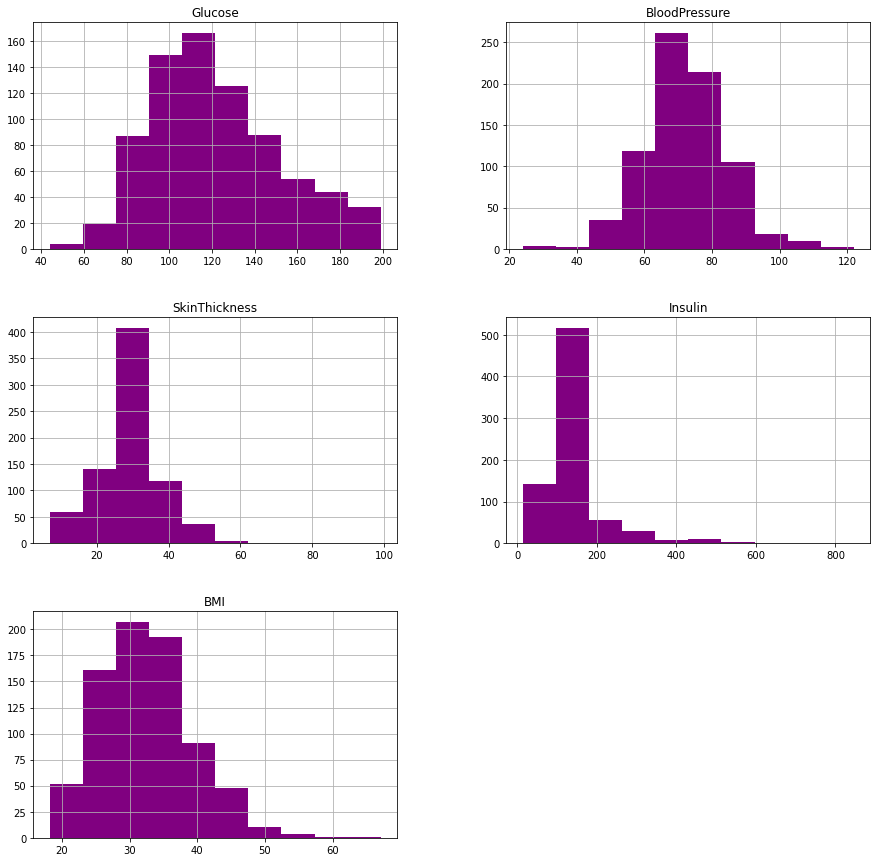

In [14]:
p = diabetes_df.hist(column=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] , figsize = (15,15), color='purple')

# Balanced Dataset for Machine Learning

In [15]:
diabetes_df['Glucose'] = diabetes_df['Glucose'].astype(int)
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].astype(int)
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].astype(int)
diabetes_df['Insulin'] = diabetes_df['Insulin'].astype(int)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


In [16]:
diabetes_df.to_csv('dataset\diabetes_cleaned.csv', index=False)

In [17]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int32
BloodPressure                 int32
SkinThickness                 int32
Insulin                       int32
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object